## Trying catplot - new code from scratch

##### What all do I need:

x-axis: codon categories  
y-axis: codon coverage

In [2]:
import os
import pandas as pd

filepath = '/Users/mansi/Desktop/haiti-ind/PfDHFR/Coverage_results/avg_cov/pool1/avg_9540Pf_PfDHFR_result.txt'

df = pd.read_csv(filepath, sep="\t")
df


Codon_pos  Codon_coverage
0            1              71
1            2             102
2            3             142
3            4             150
4            5             168
..         ...             ...
604        605              44
605        606              43
606        607              36
607        608              21
608        609              19

[609 rows x 2 columns]

In [7]:
df.Codon_coverage

0       71
1      102
2      142
3      150
4      168
      ... 
604     44
605     43
606     36
607     21
608     19
Name: Codon_coverage, Length: 609, dtype: int64

KeyboardInterrupt: 

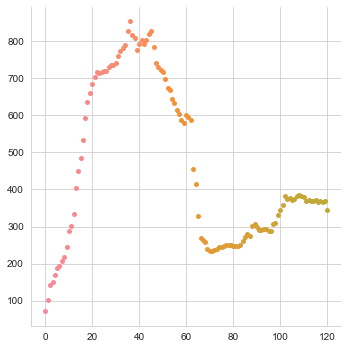

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

g= sns.catplot(x="Codon_pos", y="Codon_coverage", data=df)

g.fig.suptitle('dhfr')

plt.show()

([71, 102, 142, 150, 168, 187, 194, 207, 219, 244, 288, 302, 334, 403, 451, 485, 534, 592, 637, 661, 685, 704, 717, 714, 718, 721, 720, 732, 736, 736], [742, 760, 773, 781, 791, 829, 854, 818, 809, 778, 793, 804, 792, 804, 819, 828, 786, 742, 731, 724, 717, 699, 675, 668, 645, 634, 614, 604, 587, 579], [602, 597, 589, 456, 416, 329, 270, 263, 259, 239, 233, 235, 236, 240, 246, 244, 247, 249, 249, 249, 247, 247, 248, 250, 260, 271, 279, 275, 301, 307], [299, 291, 290, 292, 292, 288, 289, 307, 310, 330, 344, 358, 383, 375, 378, 371, 375, 382, 384, 383, 379, 370, 371, 370, 370, 371, 367, 370, 367, 369], [344, 348, 345, 349, 322, 314, 279, 241, 241, 240, 216, 218, 216, 215, 214, 213, 217, 216, 220, 229, 231, 220, 184, 188, 185, 187, 183, 181, 175, 169], [166, 167, 162, 153, 153, 155, 154, 153, 150, 151, 148, 140, 147, 146, 141, 139, 139, 138, 136, 134, 135, 131, 131, 131, 131, 129, 128, 127, 128, 128], [128, 132, 132, 133, 135, 146, 163, 176, 196, 220, 233, 224, 216, 215, 218, 223, 224, 22

TypeError: only integer scalar arrays can be converted to a scalar index

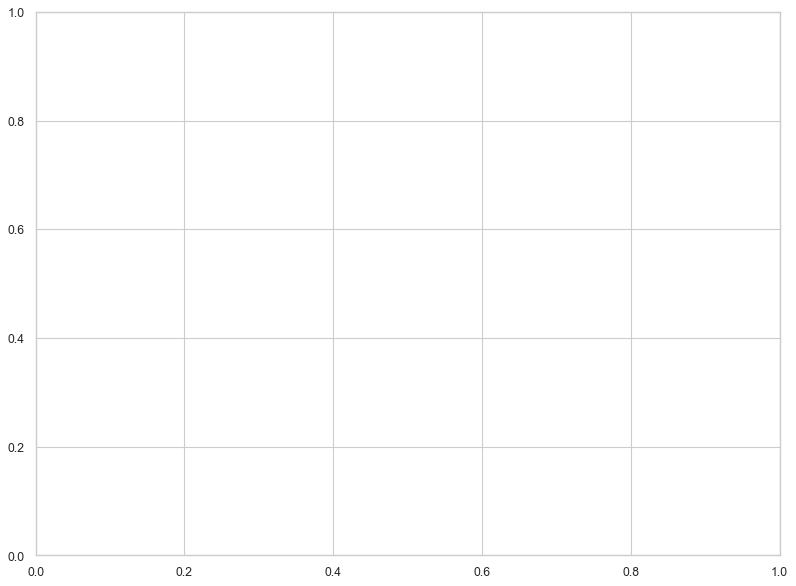

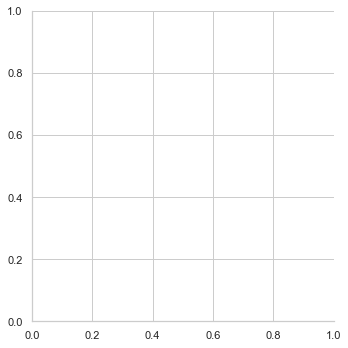

In [24]:
cc_dict2 = {}
sample_num = "9540"
cc_dict2[sample_num] = []
df_list = list(df.Codon_coverage)

for i in range(0, len(df_list), 30):
    temp_list = df_list[i:i+30]
    cc_dict2[sample_num].append(temp_list)

fin = []

# for key in cc_dict2:
#     print(len(cc_dict2[key]), key)
# print(cc_dict2)

first_key_cc_dict2 = list(cc_dict2.keys())[0]
# print(first_key_cc_dict2)

for j in range(len(cc_dict2[first_key_cc_dict2])):
    temp = []
    for key in cc_dict2:
        if j < len(cc_dict2[key]):
            for i in range(len(cc_dict2[key][j])):
#                 print("i:", i, "key:",key,"j:", j, "len(key):",len(cc_dict2[key]))
                temp.append(cc_dict2[key][j][i])
    fin.append(temp)
    
# print(fin)

fin_tuple = tuple(fin)
print(fin_tuple)

import seaborn as sns, matplotlib.pyplot as plt

data_list = []
final = []
dict_data = {}
keys_list=[]

# label_file = 

with open(r"/Users/mansi/Desktop/haiti-ind/PfDHFR/Category_results/avg_cat_cov/avg_9540Pf_PfDHFR_cat_cov.txt") as f1:
    for line in f1:
        new=line.split(",")
#         print(new)
    for i in range(len(new)):
        if len(new[i]) != 0:
            final.append(int(new[i]))

for i in range(0, len(final), 30):
        key = str(i+1)+ "\n-\n" +str(i + 30)
        keys_list.append(key)
labels_tup = tuple(keys_list)

dpi = 80   
fig = plt.figure(1, figsize=(12, 9), dpi = dpi)
ax = fig.add_subplot(111)    
sns.set(rc={'figure.figsize':(12,10)}, style="whitegrid")
bp = sns.catplot(data = fin_tuple, width = 0.5)

title = 'Codon coverge for individual samples - PfDHFR - '

ax.set_title(title, fontweight ='bold', fontsize = 14)
ax.set_ylabel('Codon coverage', fontweight ='bold', labelpad = 10.5)
ax.set_xlabel('Codon categories (in groups of 30 codons)', fontweight ='bold', labelpad = 10.5)

plt.xticks(plt.xticks()[0], labels = labels_tup)
plt.tick_params('both', labelsize='9')


plt.show()

In [31]:
data = {'category':[], 'coverage':[]}

new_keys_list=[]
for i in range(0, len(final), 30):
        key = str(i+1)+ "-" +str(i + 30)
        new_keys_list.append(key)



data['coverage'].append(fin)
data['category'].append(new_keys_list)

new_df = pd.DataFrame(data)

In [32]:
new_df

category  \
0  [1-30, 31-60, 61-90, 91-120, 121-150, 151-180,...   

                                            coverage  
0  [[71, 102, 142, 150, 168, 187, 194, 207, 219, ...

## Trying to create a new df

avg_cov_results.txt looks like cell #1

codon_pos; codon_cov


###### new df:

pos; cov; cat

###### for plotting:

x - pos
y - cov
hue - cat

OR

x - cat
y - cov

In [59]:
import os
import pandas as pd

filepath = '/Users/mansi/Desktop/haiti-ind/PfDHFR/Coverage_results/avg_cov/pool1/avg_9540Pf_PfDHFR_result.txt'

df1 = pd.read_csv(filepath, sep="\t")
df1

Codon_pos  Codon_coverage
0            1              71
1            2             102
2            3             142
3            4             150
4            5             168
..         ...             ...
604        605              44
605        606              43
606        607              36
607        608              21
608        609              19

[609 rows x 2 columns]

In [204]:
data = {'position':[], 'coverage':[], 'category':[]} #for new df

### for positions col of data_df

In [94]:
df1.Codon_pos

0        1
1        2
2        3
3        4
4        5
      ... 
604    605
605    606
606    607
607    608
608    609
Name: Codon_pos, Length: 609, dtype: int64

In [95]:
print(type(df1.Codon_pos))

<class 'pandas.core.series.Series'>


In [96]:
pos = list(df1.Codon_pos)
print(type(pos))

<class 'list'>


In [205]:
for i in range(len(pos)):
    data['position'].append(pos[i])

In [98]:
print(data)

{'position': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

### for coverage column of new df

In [99]:
df1.Codon_coverage

0       71
1      102
2      142
3      150
4      168
      ... 
604     44
605     43
606     36
607     21
608     19
Name: Codon_coverage, Length: 609, dtype: int64

In [100]:
print(type(df1.Codon_coverage))

<class 'pandas.core.series.Series'>


In [101]:
cov = list(df1.Codon_coverage)
print(type(cov))

<class 'list'>


In [206]:
for i in range(len(cov)):
    data['coverage'].append(cov[i])

In [103]:
print(data)

{'position': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

### for cat column in new df

In [104]:
cat = []
for i in range(0, len(pos), 30):
    cat_key = str(i+1)+ "-" +str(i + 30)
    print(cat_key)
    cat.append(cat_key)

1-30
31-60
61-90
91-120
121-150
151-180
181-210
211-240
241-270
271-300
301-330
331-360
361-390
391-420
421-450
451-480
481-510
511-540
541-570
571-600
601-630


In [105]:
print(cat)
print(len(cat))

['1-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '241-270', '271-300', '301-330', '331-360', '361-390', '391-420', '421-450', '451-480', '481-510', '511-540', '541-570', '571-600', '601-630']
21


### appending category column based on the values present in the position column

Cannot simply append category column because the lengths of all columns should be equal

In [156]:
"""
pseudocode

if an item in pos list is less than or equal to 30 then append 1-30 in the category column
if an item in pos list is less than 60 but more than 31 then append 31-60


OR

append cat items in a manner of 0, len(pos), 30 i.e. in intervals of 30

Selecting option #2



"""

# for i in range(len(cat)):
#     # when 
#     for j in range(0, len(pos), 30):
#         ## j:j+30
#         data['category'].append(cat[i])
### This is giving 441 but ordered categories

# for j in range(0, len(pos), 30):
#     for i in range(len(cat)):
#         data['category'].append(cat[i])
### This is giving 441 but unordered categories

cat_x=[]

for i in range(len(cat)):
    for j in range(30):
        cat_x.append(cat[i])
    

## Raghav's help

In [203]:
cat_z = []
# j = 0

# for i in range(len(cat)):
#     while j < min((i+1)*30, len(pos)):
#         cat_z.append(cat[i])
#         j += 1
        
# print(cat_z)
# print(len(cat_z))


## Optimum solution

start = 1
end = 30

for i in range(len(pos)):
    if pos[i] >= start and pos[i] <= end:
        cat_z.append(str(start)+"-"+str(end))
    if pos[i] == end:
        start = end+1
        end = end+30
print(cat_z)
print(len(cat_z))

['1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120',

In [209]:
start = 1
end = 30

for i in range(len(pos)):
    if pos[i] >= start and pos[i] <= end:
        data['category'].append(str(start)+"-"+str(end))
    if pos[i] == end:
        start = end+1
        end = end+30
# print(cat_z)
# print(len(cat_z))

In [158]:
# print(cat_x)
cat_y = ['1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '1-30', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '31-60', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '61-90', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '91-120', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '121-150', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '151-180', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '181-210', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '211-240', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '241-270', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '271-300', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '301-330', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '331-360', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '361-390', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '391-420', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '421-450', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '451-480', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '481-510', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '511-540', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '541-570', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '571-600', '601-630', '601-630', '601-630', '601-630', '601-630', '601-630', '601-630', '601-630', '601-630']

In [174]:
for i in range(len(cat_y)):
    data['category'].append(cat_y[i])

In [211]:
print(data)

{'position': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [210]:
print(len(data['position']))
print(len(data['coverage']))
print(len(data['category']))

609
609
609


In [212]:
data_df = pd.DataFrame(data)

In [213]:
data_df

position  coverage category
0           1        71     1-30
1           2       102     1-30
2           3       142     1-30
3           4       150     1-30
4           5       168     1-30
..        ...       ...      ...
604       605        44  601-630
605       606        43  601-630
606       607        36  601-630
607       608        21  601-630
608       609        19  601-630

[609 rows x 3 columns]

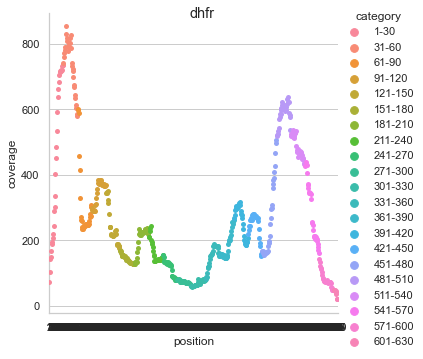

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

g= sns.catplot(x="position", y="coverage", hue="category", 
               data=data_df)

g.fig.suptitle('dhfr')

plt.show()


# sns.set_style("whitegrid")

# plt.show()

# plt.savefig("Figure_dhfr.png") 

# display(snp_df_individ.describe())

# display(snp_df_individ.groupby('method')['coverage'].quantile([.25,.50, .75, 1]), print("quantile"))


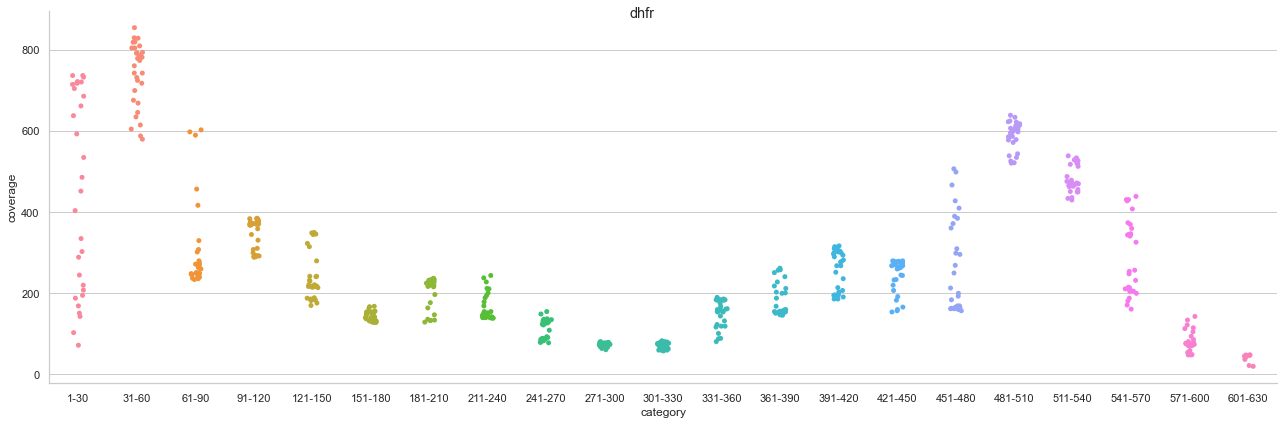

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

g= sns.catplot(x="category", y="coverage", data=data_df, height=6, aspect=3)

g.fig.suptitle('dhfr')

plt.show()

## Testing full code - for 9640 dhfr file

#### Edit: successful

<class 'list'>
<class 'list'>
609
609
609


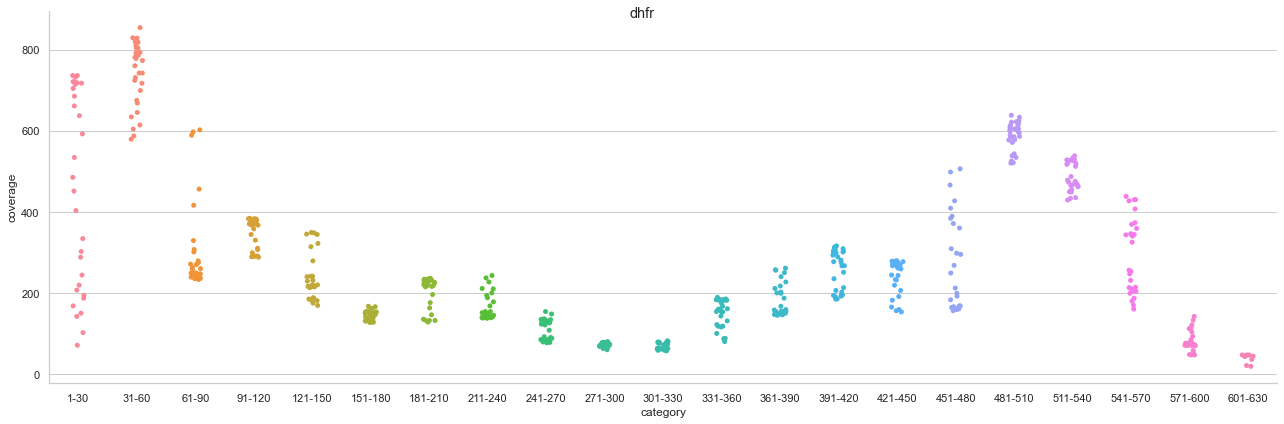

In [214]:
import os
import pandas as pd

filepath = '/Users/mansi/Desktop/haiti-ind/PfDHFR/Coverage_results/avg_cov/pool1/avg_9540Pf_PfDHFR_result.txt'

df1 = pd.read_csv(filepath, sep="\t")
df1

data = {'position':[], 'coverage':[], 'category':[]} #for new df

### For position column

pos = list(df1.Codon_pos)
for i in range(len(pos)):
    data['position'].append(pos[i])
    
### For coverage column

cov = list(df1.Codon_coverage)
for i in range(len(cov)):
    data['coverage'].append(cov[i])
    
    
### For category column

start = 1
end = 30

for i in range(len(pos)):
    if pos[i] >= start and pos[i] <= end:
        data['category'].append(str(start)+"-"+str(end))
    if pos[i] == end:
        start = end+1
        end = end+30
        
print(len(data['position']))
print(len(data['coverage']))
print(len(data['category']))

data_df = pd.DataFrame(data)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

g= sns.catplot(x="category", y="coverage", data=data_df, height=6, aspect=3)

g.fig.suptitle('dhfr')

plt.show()

## Trying to run for two dhfr file - 9540 and 9593

#### Separately

609
609
609


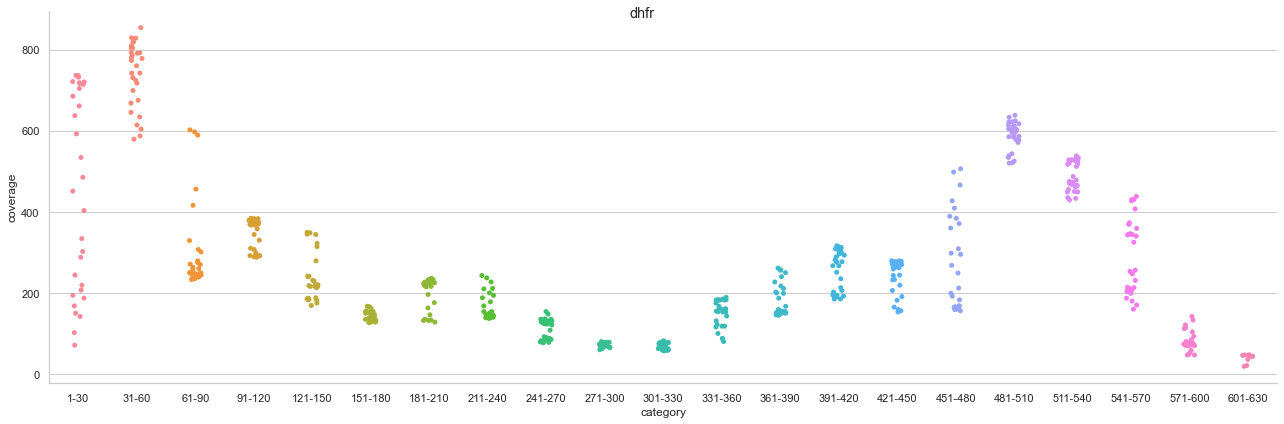

609
609
609


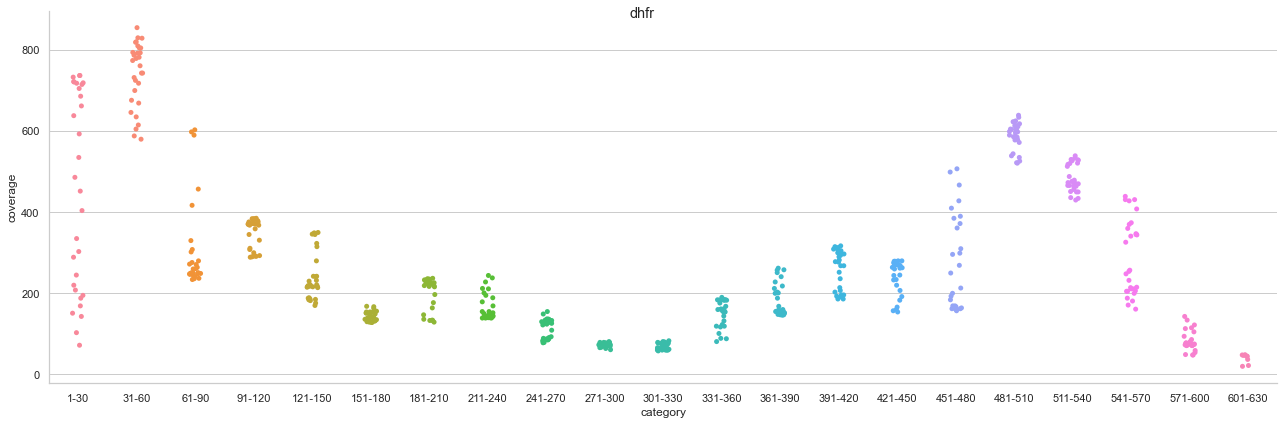

In [216]:
import os
import pandas as pd

filepath_list = ['/Users/mansi/Desktop/haiti-ind/PfDHFR/Coverage_results/avg_cov/pool1/avg_9540Pf_PfDHFR_result.txt', '/Users/mansi/Desktop/haiti-ind/PfDHFR/Coverage_results/avg_cov/pool1/avg_9593Pf_PfDHFR_result.txt']

for file in filepath_list:
    df1 = pd.read_csv(filepath, sep="\t")
    df1

    data = {'position':[], 'coverage':[], 'category':[]} #for new df

    ### For position column

    pos = list(df1.Codon_pos)
    for i in range(len(pos)):
        data['position'].append(pos[i])

    ### For coverage column

    cov = list(df1.Codon_coverage)
    for i in range(len(cov)):
        data['coverage'].append(cov[i])


    ### For category column

    start = 1
    end = 30

    for i in range(len(pos)):
        if pos[i] >= start and pos[i] <= end:
            data['category'].append(str(start)+"-"+str(end))
        if pos[i] == end:
            start = end+1
            end = end+30

    print(len(data['position']))
    print(len(data['coverage']))
    print(len(data['category']))

    data_df = pd.DataFrame(data)

    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set_style("whitegrid")

    g= sns.catplot(x="category", y="coverage", data=data_df, height=6, aspect=3)

    g.fig.suptitle('dhfr')

    plt.show()

## Now running the same as above but together - meaning adding one df to another

Edit: successful

609
609
609
1218
1218
1218


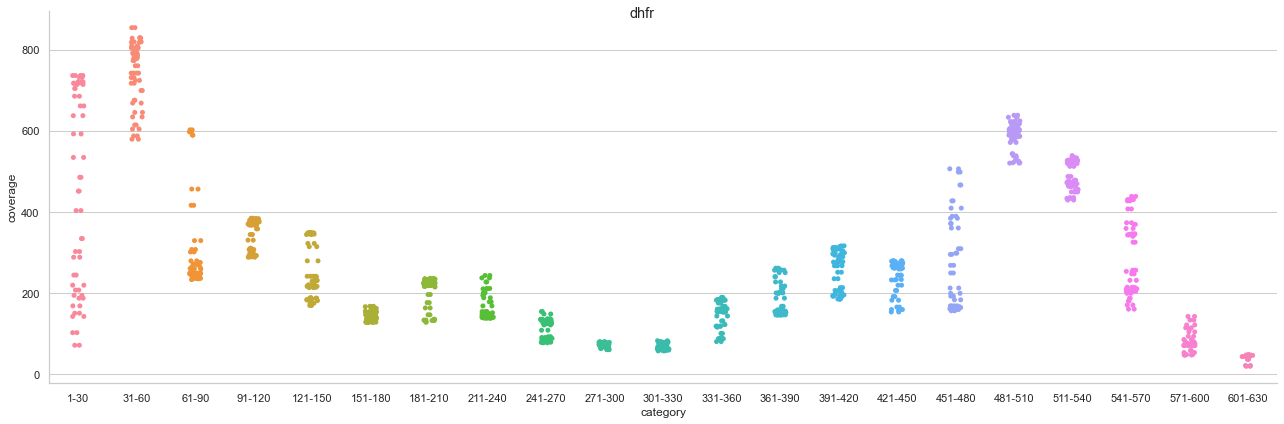

In [217]:
import os
import pandas as pd

data = {'position':[], 'coverage':[], 'category':[]} #for new df

filepath_list = ['/Users/mansi/Desktop/haiti-ind/PfDHFR/Coverage_results/avg_cov/pool1/avg_9540Pf_PfDHFR_result.txt', '/Users/mansi/Desktop/haiti-ind/PfDHFR/Coverage_results/avg_cov/pool1/avg_9593Pf_PfDHFR_result.txt']

for file in filepath_list:
    df1 = pd.read_csv(filepath, sep="\t")
    df1

    ### For position column

    pos = list(df1.Codon_pos)
    for i in range(len(pos)):
        data['position'].append(pos[i])

    ### For coverage column

    cov = list(df1.Codon_coverage)
    for i in range(len(cov)):
        data['coverage'].append(cov[i])


    ### For category column

    start = 1
    end = 30

    for i in range(len(pos)):
        if pos[i] >= start and pos[i] <= end:
            data['category'].append(str(start)+"-"+str(end))
        if pos[i] == end:
            start = end+1
            end = end+30

    print(len(data['position']))
    print(len(data['coverage']))
    print(len(data['category']))

data_df = pd.DataFrame(data)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

g= sns.catplot(x="category", y="coverage", data=data_df, height=6, aspect=3)

g.fig.suptitle('dhfr')

plt.show()

## Now trying same as above but for pool1

609
609
609
1218
1218
1218
1827
1827
1827
2436
2436
2436
3045
3045
3045
3654
3654
3654
4263
4263
4263
4872
4872
4872
5481
5481
5481
6090
6090
6090


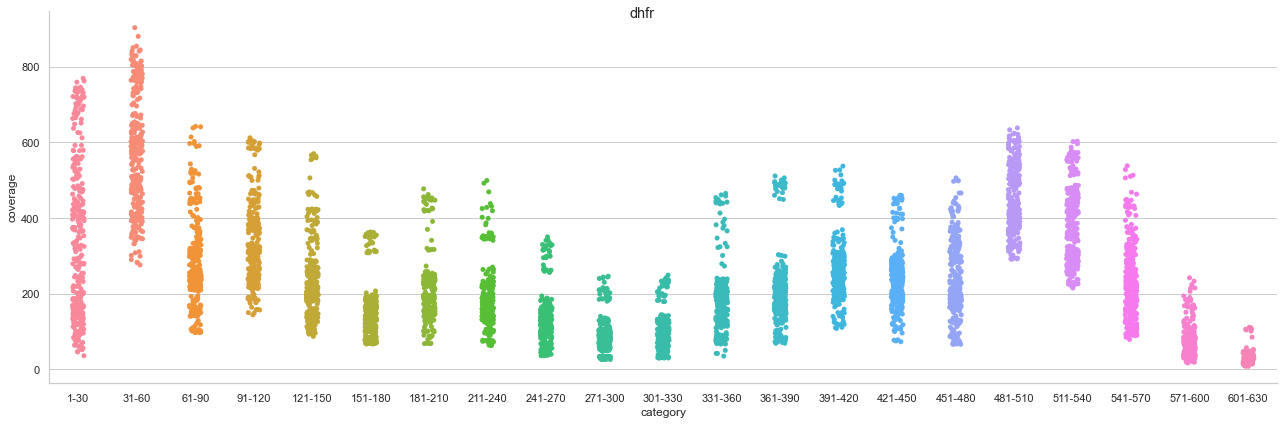

In [218]:
import os
import pandas as pd

data = {'position':[], 'coverage':[], 'category':[]} #for new df

directory = r'/Users/mansi/Desktop/haiti-ind/PfDHFR/Coverage_results/avg_cov/pool1'
for filename in os.listdir(directory):
    if filename != ".DS_Store":
        filepath = os.path.join(directory, filename)
        df1 = pd.read_csv(filepath, sep="\t")
        df1

        ### For position column

        pos = list(df1.Codon_pos)
        for i in range(len(pos)):
            data['position'].append(pos[i])

        ### For coverage column

        cov = list(df1.Codon_coverage)
        for i in range(len(cov)):
            data['coverage'].append(cov[i])


        ### For category column

        start = 1
        end = 30

        for i in range(len(pos)):
            if pos[i] >= start and pos[i] <= end:
                data['category'].append(str(start)+"-"+str(end))
            if pos[i] == end:
                start = end+1
                end = end+30

        print(len(data['position']))
        print(len(data['coverage']))
        print(len(data['category']))

data_df = pd.DataFrame(data)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

g= sns.catplot(x="category", y="coverage", data=data_df, height=6, aspect=3)

g.fig.suptitle('dhfr')

plt.show()

## Now trying the same but for all dhfr pool1 to 10

609
609
609
1218
1218
1218
1827
1827
1827
2436
2436
2436
3045
3045
3045
3654
3654
3654
4263
4263
4263
4872
4872
4872
5481
5481
5481
6090
6090
6090


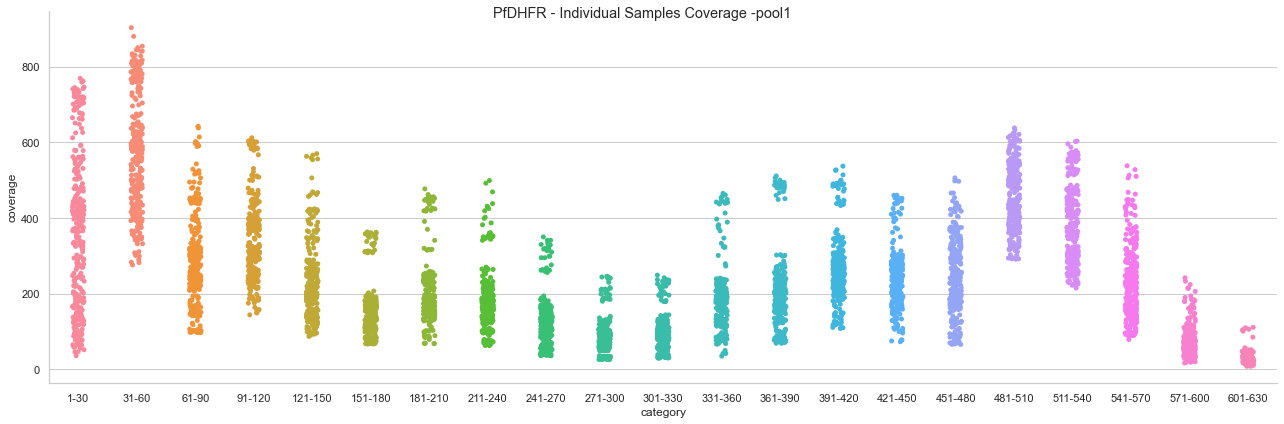

position     coverage
count  6090.000000  6090.000000
mean    305.000000   242.384236
std     175.817355   158.633359
min       1.000000     8.000000
25%     153.000000   127.000000
50%     305.000000   204.000000
75%     457.000000   319.000000
max     609.000000   903.000000

609
609
609
1218
1218
1218
1827
1827
1827
2436
2436
2436
3045
3045
3045
3654
3654
3654
4263
4263
4263
4872
4872
4872
5481
5481
5481
6090
6090
6090


<Figure size 864x720 with 0 Axes>

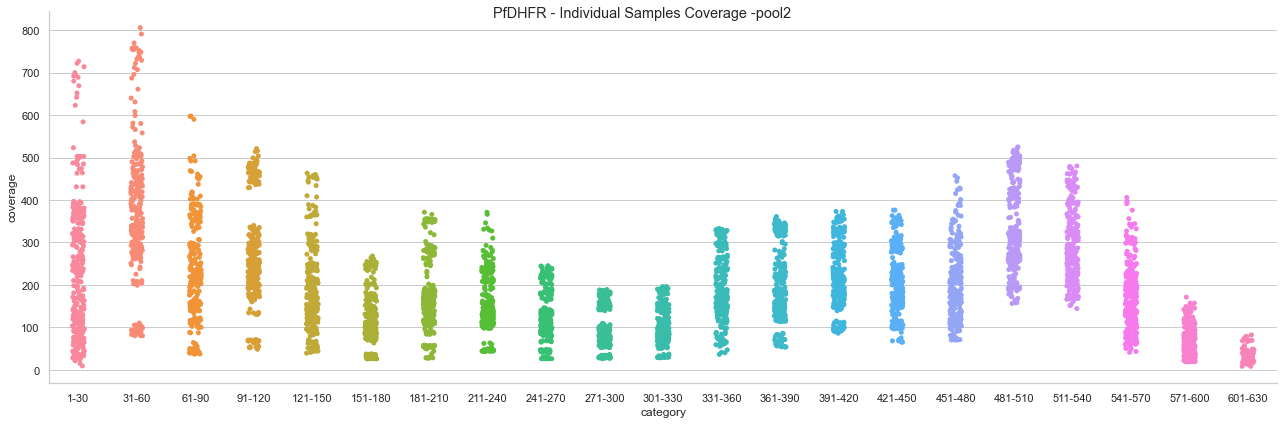

position     coverage
count  6090.000000  6090.000000
mean    305.000000   194.145320
std     175.817355   117.415343
min       1.000000     8.000000
25%     153.000000   106.000000
50%     305.000000   171.000000
75%     457.000000   263.000000
max     609.000000   806.000000

609
609
609
1218
1218
1218
1827
1827
1827
2435
2435
2435
3044
3044
3044
3653
3653
3653
4262
4262
4262
4871
4871
4871
5480
5480
5480


<Figure size 864x720 with 0 Axes>

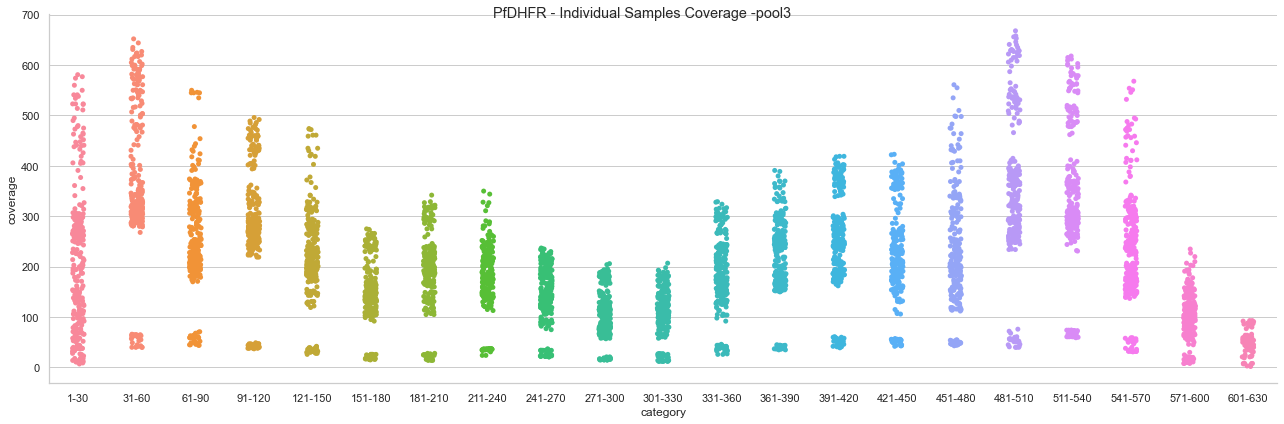

position     coverage
count  5480.000000  5480.000000
mean    304.944526   212.341058
std     175.787025   125.621964
min       1.000000     2.000000
25%     153.000000   122.000000
50%     305.000000   196.000000
75%     457.000000   284.000000
max     609.000000   668.000000

609
609
609
1218
1218
1218
1827
1827
1827
2436
2436
2436
3045
3045
3045
3654
3654
3654
4263
4263
4263
4872
4872
4872
5481
5481
5481
6090
6090
6090


<Figure size 864x720 with 0 Axes>

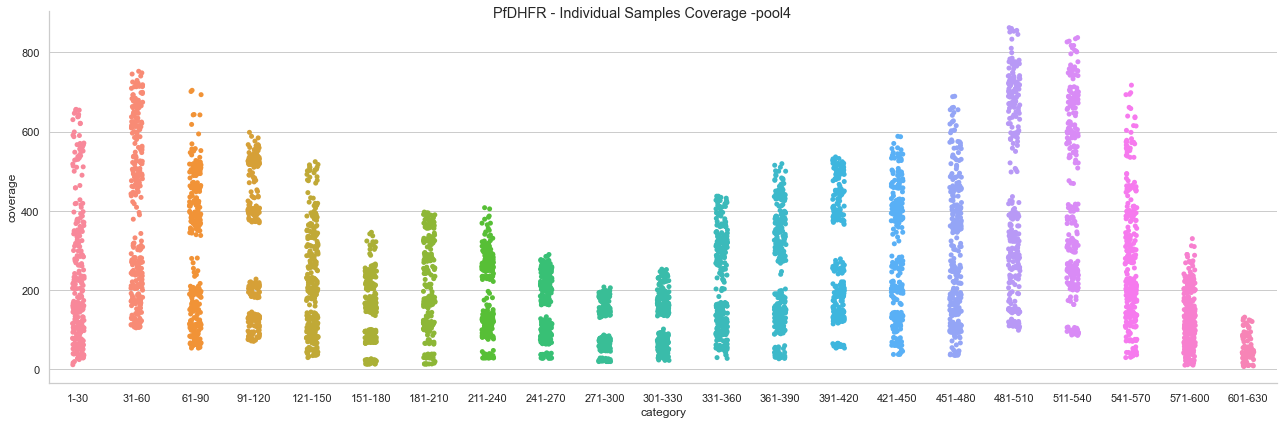

position     coverage
count  6090.000000  6090.000000
mean    305.000000   242.396552
std     175.817355   173.237032
min       1.000000     8.000000
25%     153.000000   110.000000
50%     305.000000   195.000000
75%     457.000000   344.000000
max     609.000000   862.000000

609
609
609
1218
1218
1218
1827
1827
1827
2436
2436
2436
3045
3045
3045
3654
3654
3654
4263
4263
4263
4872
4872
4872
5481
5481
5481
6090
6090
6090


<Figure size 864x720 with 0 Axes>

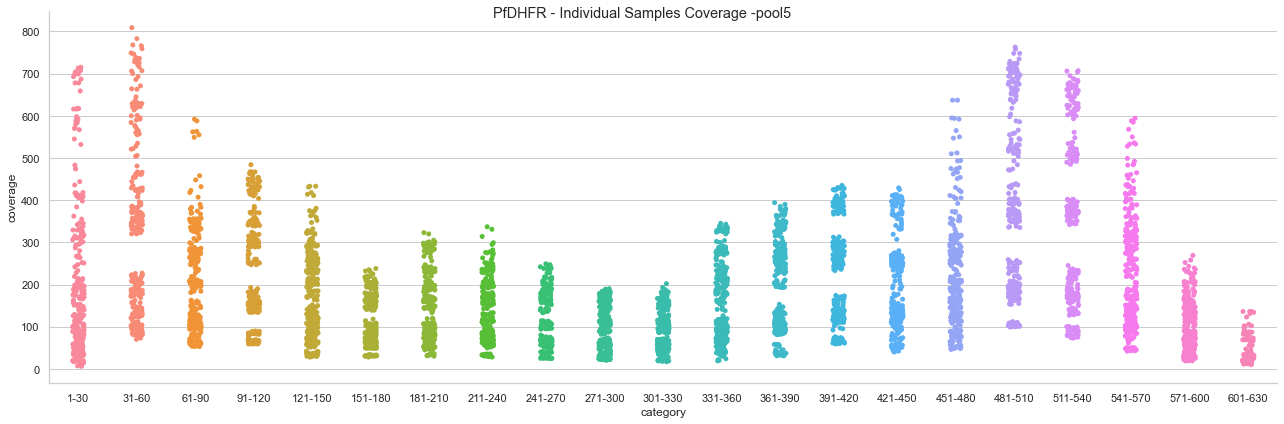

position     coverage
count  6090.000000  6090.000000
mean    305.000000   186.247619
std     175.817355   143.319403
min       1.000000     6.000000
25%     153.000000    82.000000
50%     305.000000   148.000000
75%     457.000000   253.000000
max     609.000000   809.000000

609
609
609
1218
1218
1218
1827
1827
1827
2436
2436
2436
3045
3045
3045
3654
3654
3654
4263
4263
4263
4872
4872
4872
5481
5481
5481
6090
6090
6090


<Figure size 864x720 with 0 Axes>

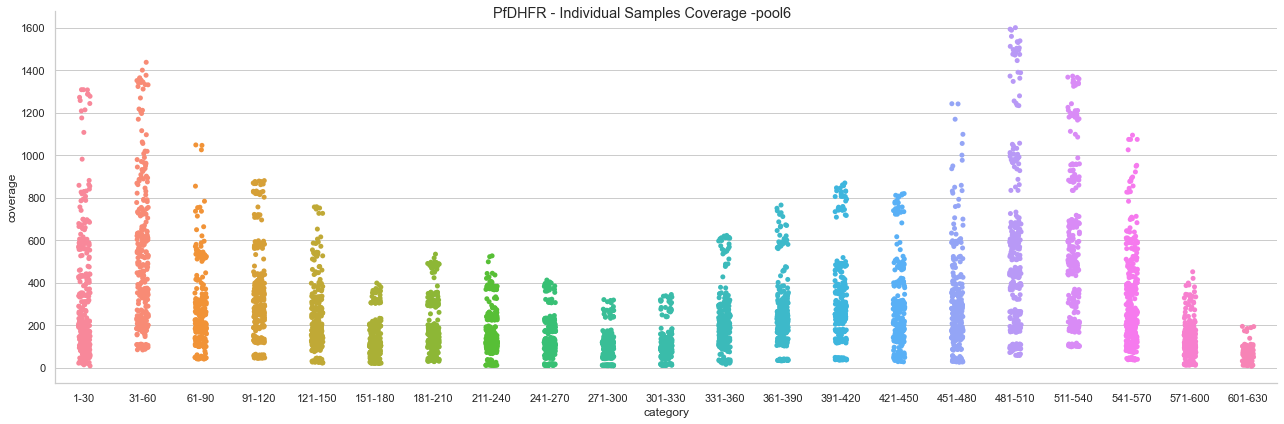

position     coverage
count  6090.000000  6090.000000
mean    305.000000   264.764860
std     175.817355   244.206747
min       1.000000     6.000000
25%     153.000000   108.000000
50%     305.000000   187.000000
75%     457.000000   335.750000
max     609.000000  1600.000000

609
609
609
1218
1218
1218
1827
1827
1827
2436
2436
2436
3045
3045
3045
3654
3654
3654
4263
4263
4263
4872
4872
4872
5481
5481
5481
6090
6090
6090


<Figure size 864x720 with 0 Axes>

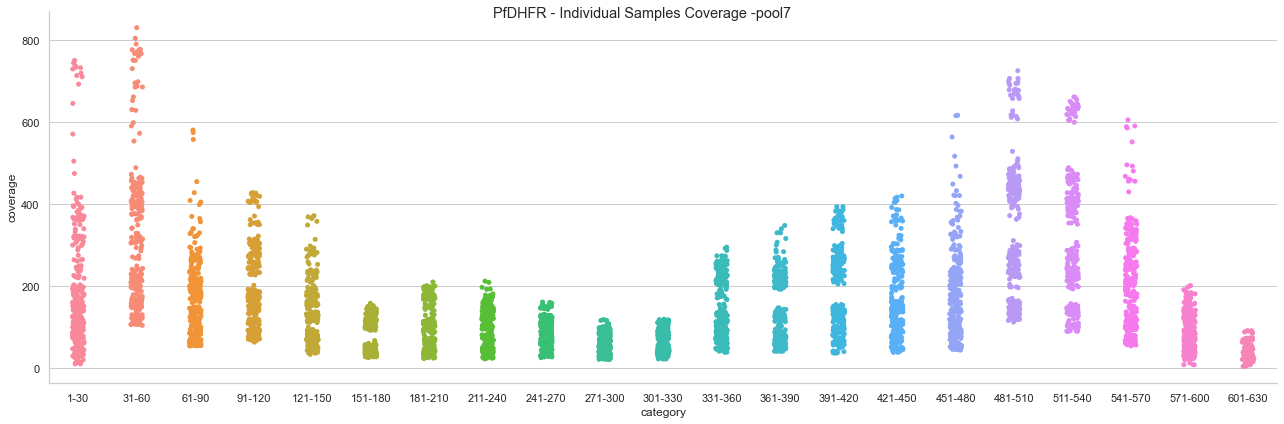

position     coverage
count  6090.000000  6090.000000
mean    305.000000   155.119376
std     175.817355   126.984175
min       1.000000     4.000000
25%     153.000000    66.000000
50%     305.000000   117.000000
75%     457.000000   209.000000
max     609.000000   831.000000

607
607
607
1216
1216
1216
1636
1636
1636
2245
2245
2245
2271
2271
2271
2847
2847
2847
3456
3456
3456
4065
4065
4065
4644
4644
4644


<Figure size 864x720 with 0 Axes>

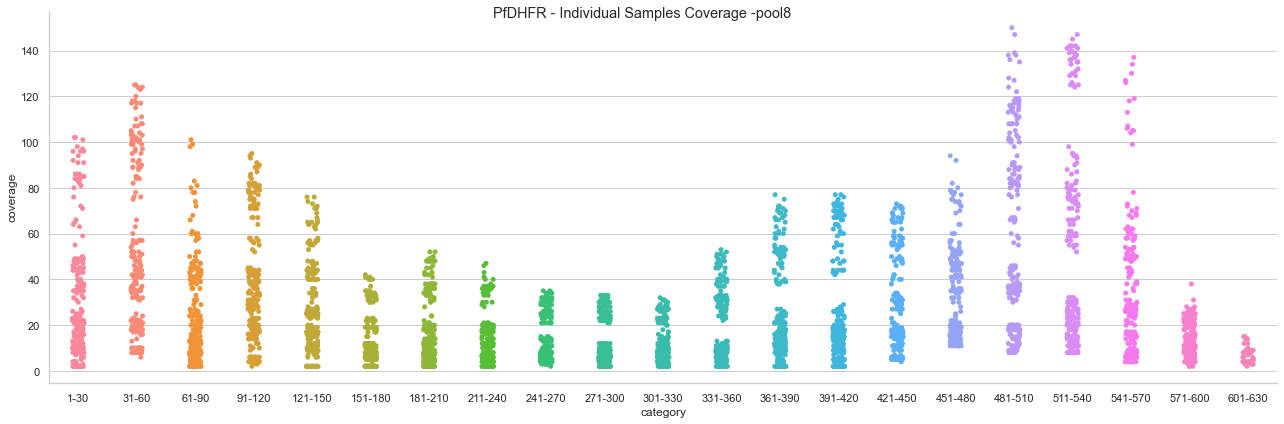

position     coverage
count  4644.000000  4644.000000
mean    290.774117    25.299096
std     172.094679    26.007800
min       1.000000     2.000000
25%     142.000000     8.000000
50%     287.500000    16.000000
75%     434.000000    34.000000
max     609.000000   150.000000

609
609
609
1217
1217
1217
1629
1629
1629
2238
2238
2238
2846
2846
2846
3439
3439
3439
4046
4046
4046


<Figure size 864x720 with 0 Axes>

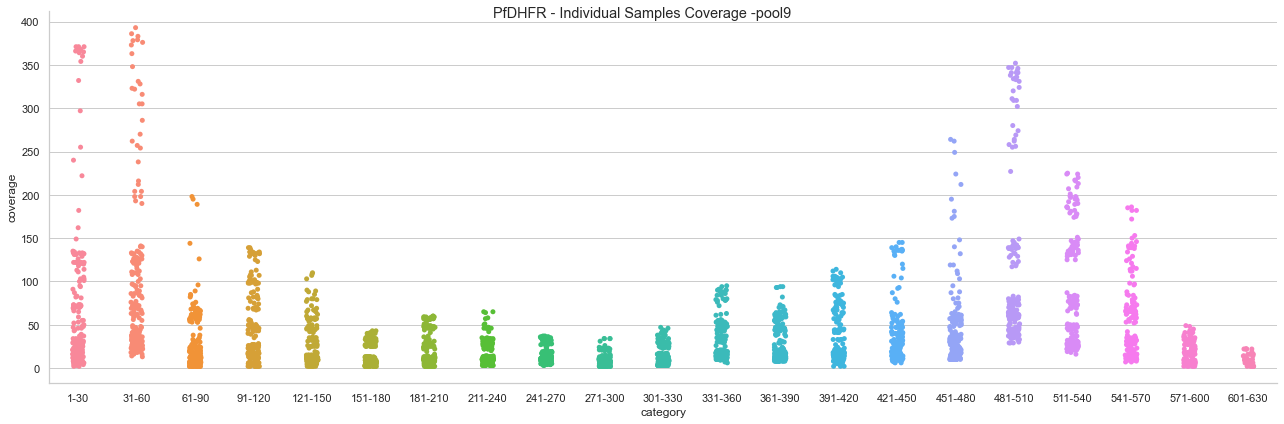

position     coverage
count  4046.000000  4046.000000
mean    293.497034    38.912259
std     172.559284    53.098830
min       1.000000     2.000000
25%     145.000000    10.000000
50%     289.500000    19.000000
75%     437.750000    46.000000
max     609.000000   393.000000

609
609
609
643
643
643
1251
1251
1251
1860
1860
1860
1884
1884
1884
2448
2448
2448


<Figure size 864x720 with 0 Axes>

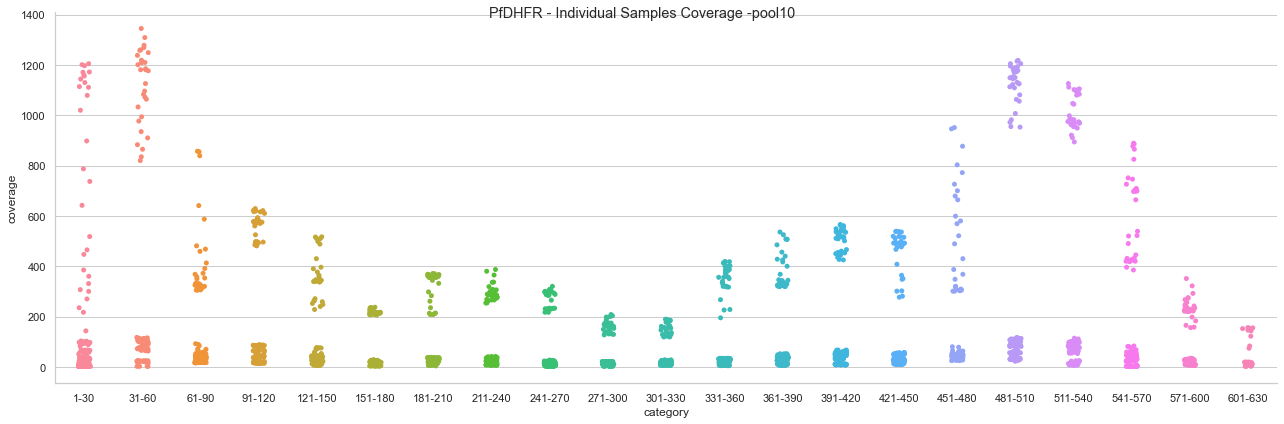

position     coverage
count  2448.000000  2448.000000
mean    292.831291   143.575163
std     176.368078   252.271476
min       1.000000     2.000000
25%     139.000000    15.000000
50%     292.000000    34.000000
75%     445.000000   114.000000
max     609.000000  1345.000000

<Figure size 864x720 with 0 Axes>

In [228]:
import os
import pandas as pd


for i in range(1, 11):
    pool_id = "pool"+str(i)
    data = {'position':[], 'coverage':[], 'category':[]} #for new df
    directory = r'/Users/mansi/Desktop/haiti-ind/PfDHFR/Coverage_results/avg_cov/'+pool_id
    for filename in os.listdir(directory):
        if filename != ".DS_Store":
            filepath = os.path.join(directory, filename)
            df1 = pd.read_csv(filepath, sep="\t")
            df1

            ### For position column

            pos = list(df1.Codon_pos)
            for i in range(len(pos)):
                data['position'].append(pos[i])

            ### For coverage column

            cov = list(df1.Codon_coverage)
            for i in range(len(cov)):
                data['coverage'].append(cov[i])


            ### For category column

            start = 1
            end = 30

            for i in range(len(pos)):
                if pos[i] >= start and pos[i] <= end:
                    data['category'].append(str(start)+"-"+str(end))
                if pos[i] == end:
                    start = end+1
                    end = end+30
                    
            print(len(data['position']))
            print(len(data['coverage']))
            print(len(data['category']))



    data_df = pd.DataFrame(data)

    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set_style("whitegrid")

    g= sns.catplot(x="category", y="coverage", data=data_df, height=6, aspect=3)
    title = 'PfDHFR - Individual Samples Coverage -'+pool_id
    g.fig.suptitle(title)

    plt.show()
    outputfile = '/Users/mansi/Desktop/haiti-ind/PfDHFR/Pool_Images/Catplot/'+"PfDHFR-ind-catplt-"+pool_id+".png"
    plt.savefig(outputfile)
    
    display(data_df.describe())


PfDHFR - Individual Samples Coverage - pool1


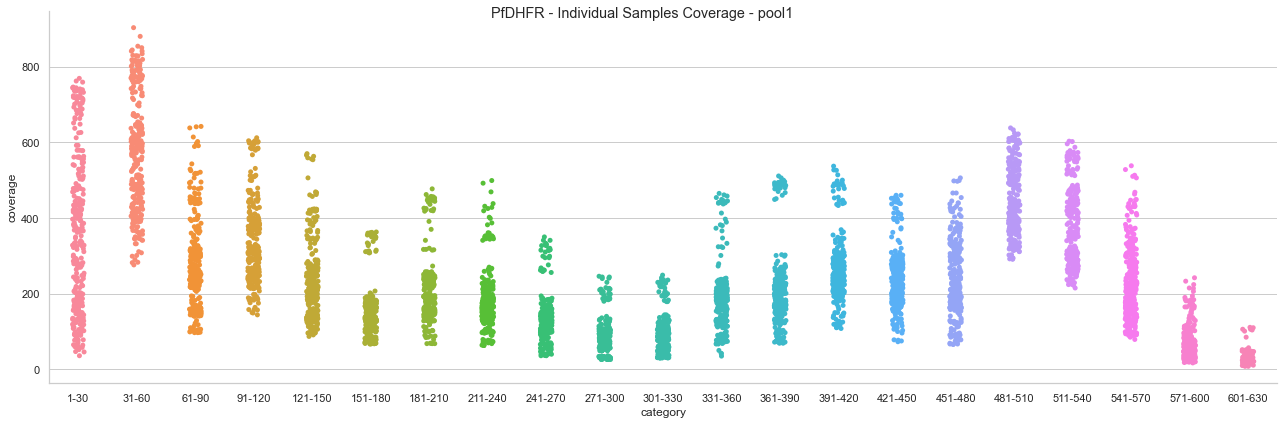

position     coverage
count  6090.000000  6090.000000
mean    305.000000   242.384236
std     175.817355   158.633359
min       1.000000     8.000000
25%     153.000000   127.000000
50%     305.000000   204.000000
75%     457.000000   319.000000
max     609.000000   903.000000

PfDHFR - Individual Samples Coverage - pool2


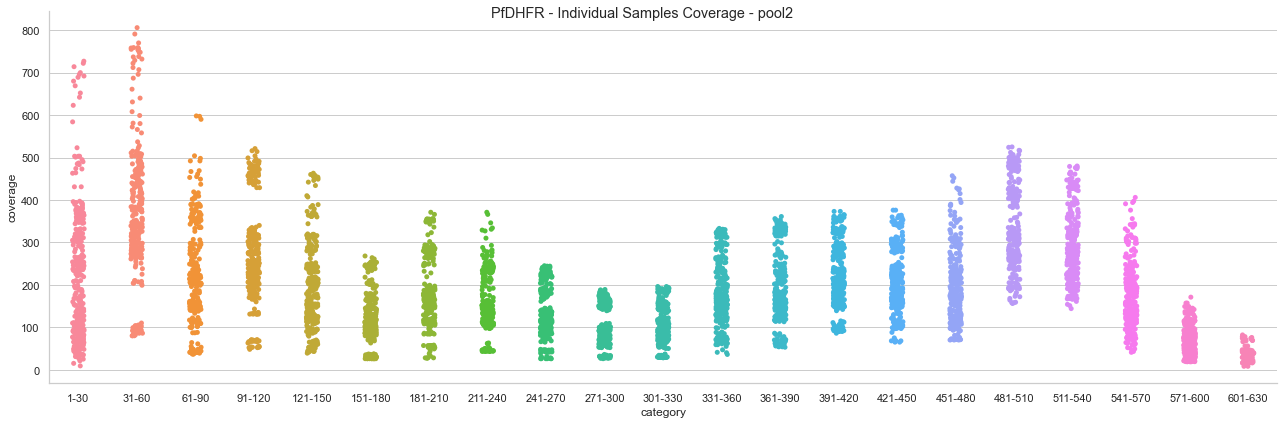

position     coverage
count  6090.000000  6090.000000
mean    305.000000   194.145320
std     175.817355   117.415343
min       1.000000     8.000000
25%     153.000000   106.000000
50%     305.000000   171.000000
75%     457.000000   263.000000
max     609.000000   806.000000

PfDHFR - Individual Samples Coverage - pool3


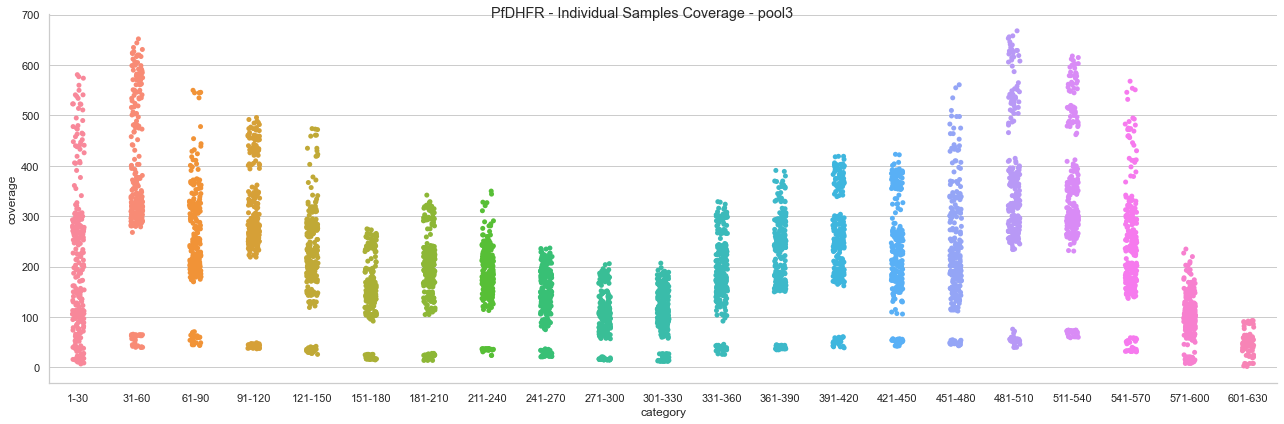

position     coverage
count  5480.000000  5480.000000
mean    304.944526   212.341058
std     175.787025   125.621964
min       1.000000     2.000000
25%     153.000000   122.000000
50%     305.000000   196.000000
75%     457.000000   284.000000
max     609.000000   668.000000

PfDHFR - Individual Samples Coverage - pool4


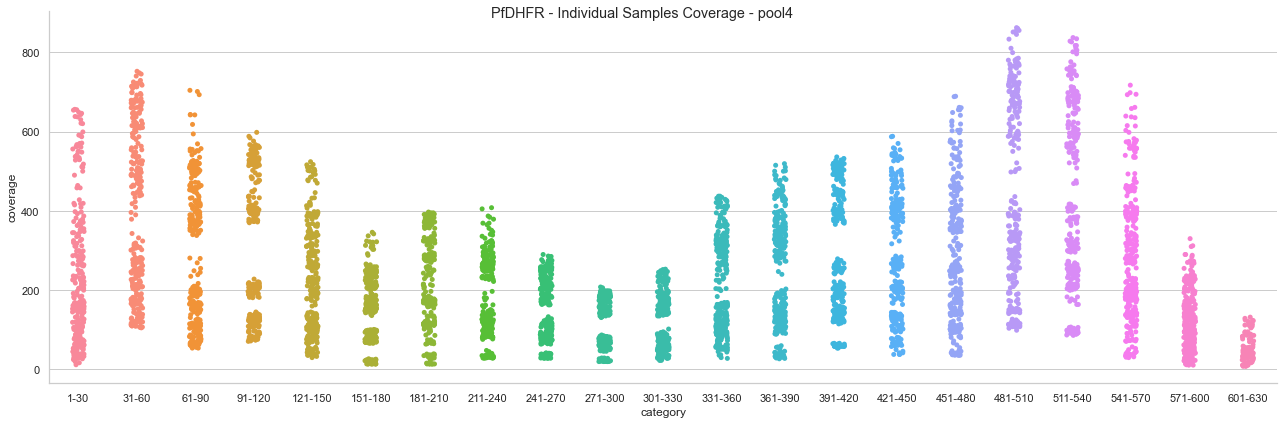

position     coverage
count  6090.000000  6090.000000
mean    305.000000   242.396552
std     175.817355   173.237032
min       1.000000     8.000000
25%     153.000000   110.000000
50%     305.000000   195.000000
75%     457.000000   344.000000
max     609.000000   862.000000

PfDHFR - Individual Samples Coverage - pool5


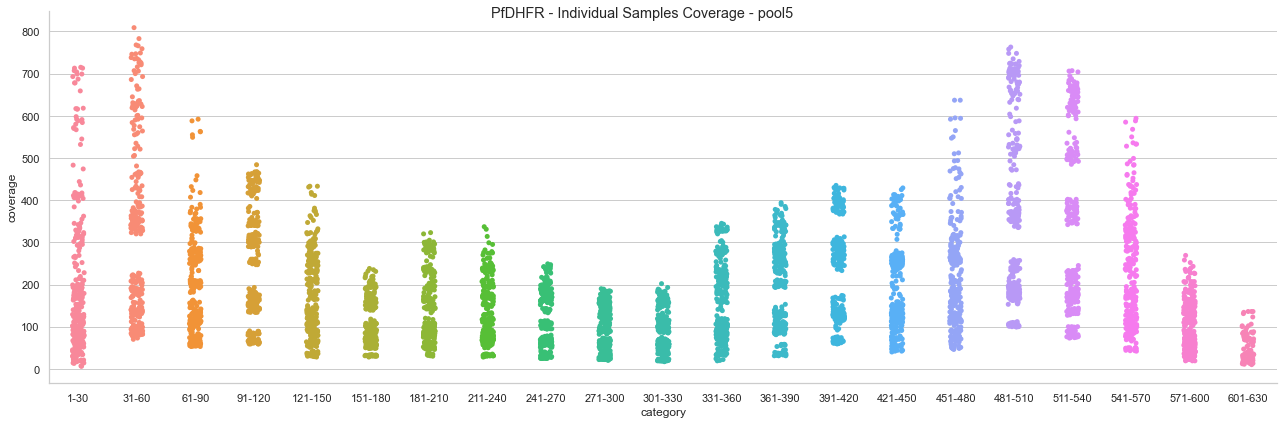

position     coverage
count  6090.000000  6090.000000
mean    305.000000   186.247619
std     175.817355   143.319403
min       1.000000     6.000000
25%     153.000000    82.000000
50%     305.000000   148.000000
75%     457.000000   253.000000
max     609.000000   809.000000

PfDHFR - Individual Samples Coverage - pool6


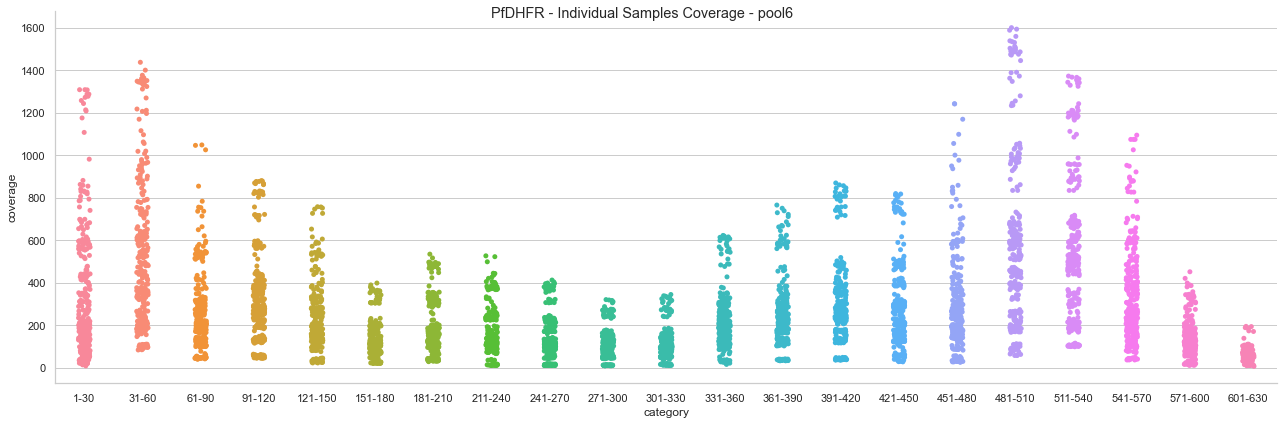

position     coverage
count  6090.000000  6090.000000
mean    305.000000   264.764860
std     175.817355   244.206747
min       1.000000     6.000000
25%     153.000000   108.000000
50%     305.000000   187.000000
75%     457.000000   335.750000
max     609.000000  1600.000000

PfDHFR - Individual Samples Coverage - pool7


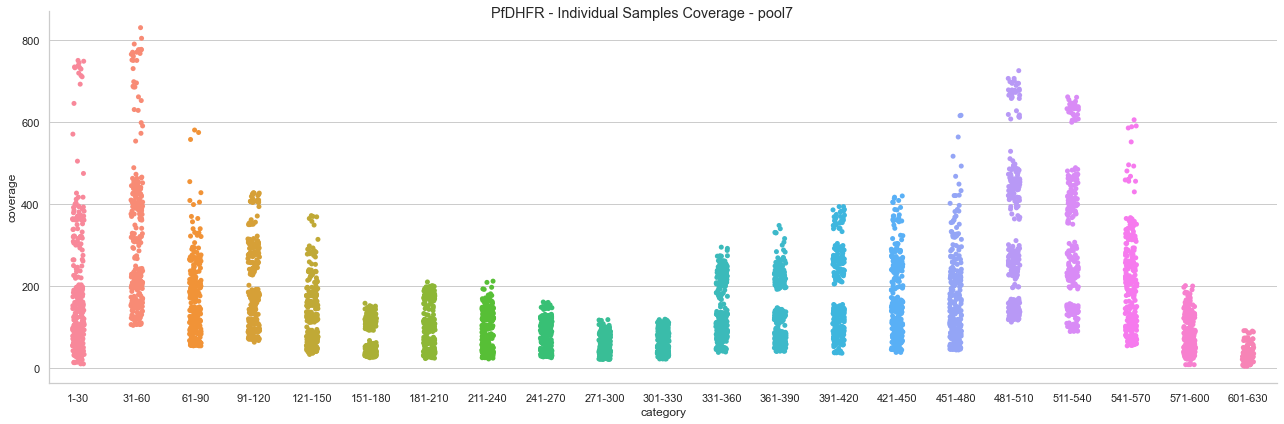

position     coverage
count  6090.000000  6090.000000
mean    305.000000   155.119376
std     175.817355   126.984175
min       1.000000     4.000000
25%     153.000000    66.000000
50%     305.000000   117.000000
75%     457.000000   209.000000
max     609.000000   831.000000

PfDHFR - Individual Samples Coverage - pool8


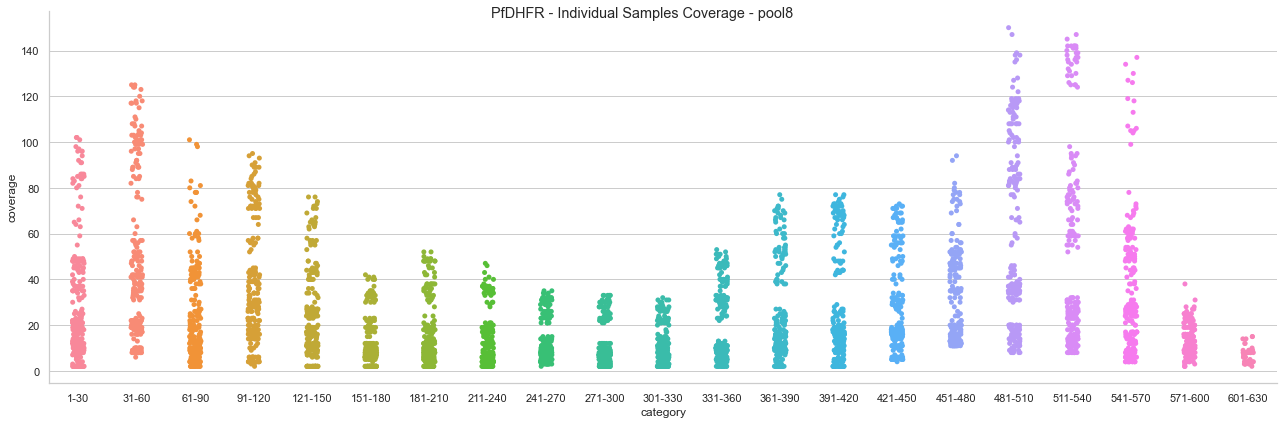

position     coverage
count  4644.000000  4644.000000
mean    290.774117    25.299096
std     172.094679    26.007800
min       1.000000     2.000000
25%     142.000000     8.000000
50%     287.500000    16.000000
75%     434.000000    34.000000
max     609.000000   150.000000

PfDHFR - Individual Samples Coverage - pool9


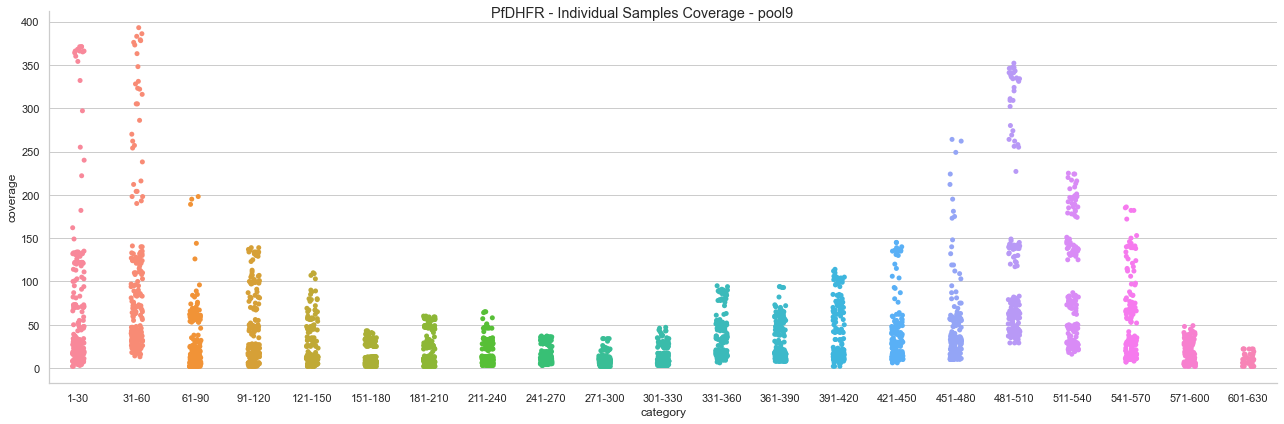

position     coverage
count  4046.000000  4046.000000
mean    293.497034    38.912259
std     172.559284    53.098830
min       1.000000     2.000000
25%     145.000000    10.000000
50%     289.500000    19.000000
75%     437.750000    46.000000
max     609.000000   393.000000

PfDHFR - Individual Samples Coverage - pool10


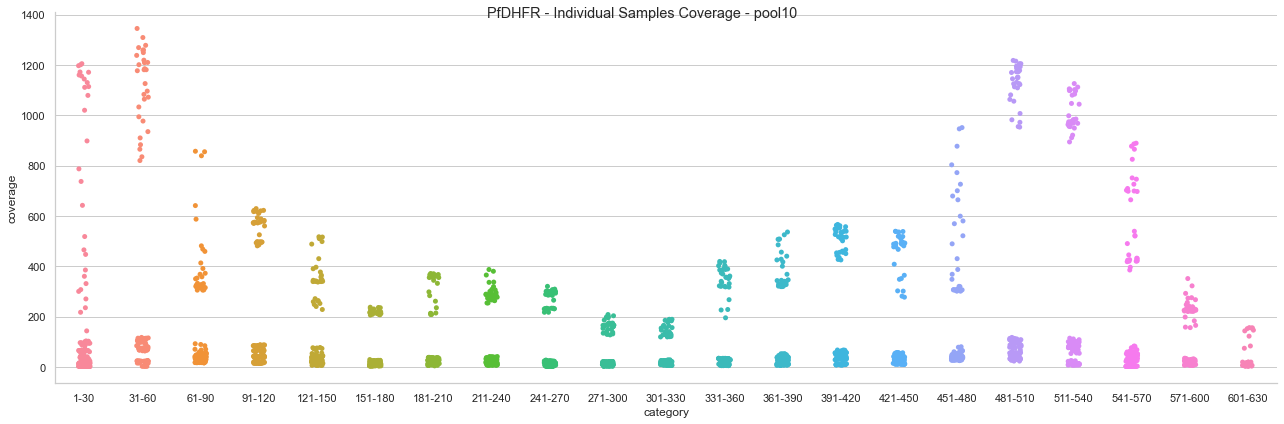

position     coverage
count  2448.000000  2448.000000
mean    292.831291   143.575163
std     176.368078   252.271476
min       1.000000     2.000000
25%     139.000000    15.000000
50%     292.000000    34.000000
75%     445.000000   114.000000
max     609.000000  1345.000000

In [239]:
import os
import pandas as pd


for i in range(1, 11):
    pool_id = "pool"+str(i)
    data = {'position':[], 'coverage':[], 'category':[]} #for new df
    directory = r'/Users/mansi/Desktop/haiti-ind/PfDHFR/Coverage_results/avg_cov/'+pool_id
    for filename in os.listdir(directory):
        if filename != ".DS_Store":
            filepath = os.path.join(directory, filename)
            df1 = pd.read_csv(filepath, sep="\t")
            df1

            ### For position column

            pos = list(df1.Codon_pos)
            for i in range(len(pos)):
                data['position'].append(pos[i])

            ### For coverage column

            cov = list(df1.Codon_coverage)
            for i in range(len(cov)):
                data['coverage'].append(cov[i])


            ### For category column

            start = 1
            end = 30

            for i in range(len(pos)):
                if pos[i] >= start and pos[i] <= end:
                    data['category'].append(str(start)+"-"+str(end))
                if pos[i] == end:
                    start = end+1
                    end = end+30
                    
#             print(len(data['position']))
#             print(len(data['coverage']))
#             print(len(data['category']))



    data_df = pd.DataFrame(data)

    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set_style("whitegrid")

    g= sns.catplot(x="category", y="coverage", data=data_df, height=6, aspect=3)
    title = 'PfDHFR - Individual Samples Coverage - '+pool_id
    g.fig.suptitle(title)
    print(title)

    plt.show()
#     outputfile = '/Users/mansi/Desktop/haiti-ind/PfDHFR/Pool_Images/Catplot/'+"PfDHFR-ind-catplt-"+pool_id+".png"
#     plt.savefig(outputfile)
    
    display(data_df.describe())


## Adding CT values

In [1]:
import pandas as pd
import os
import subprocess

excel_path = r'/Users/mansi/Desktop/haiti-ind/PfDHFR/Haiti_PetValues.xlsx'

df_pet = pd.read_excel(excel_path, sheet_name = "CovValidation")
df_pet

Sequences_name  SPECIES_CT    pool  dhfr  mdr1  crt  dhps
0             9540       20.99   pool1   NaN   NaN  NaN   NaN
1             9593       22.01   pool1   NaN   NaN  NaN   NaN
2             9955       22.02   pool1   NaN   NaN  NaN   NaN
3             9696       22.06   pool1   NaN   NaN  NaN   NaN
4             9832       22.30   pool1   NaN   NaN  NaN   NaN
..             ...         ...     ...   ...   ...  ...   ...
95            9810       40.10  pool10   NaN   NaN  NaN   NaN
96           10222       40.10  pool10   NaN   NaN  NaN   NaN
97            9569       40.20  pool10   NaN   NaN  NaN   NaN
98           10147       40.30  pool10   NaN   NaN  NaN   NaN
99            9567       40.40  pool10   NaN   NaN  NaN   NaN

[100 rows x 7 columns]

In [2]:
ct_val = list(df_pet.SPECIES_CT)
print(ct_val)

[20.99, 22.01, 22.02, 22.06, 22.3, 22.4, 22.4, 22.5, 22.55, 22.6, 22.95, 22.95, 23.27, 23.9, 23.9, 24.42, 24.5, 24.6, 24.7, 24.75, 25.2, 25.3, 25.37, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.6, 27.0, 27.1, 27.2, 27.7, 27.9, 28.1, 28.3, 28.38, 28.6, 28.9, 29.1, 29.3, 29.4, 29.5, 29.7, 29.88, 29.9, 30.24, 30.4, 30.9, 31.1, 31.2, 31.2, 31.4, 31.5, 31.6, 32.17, 32.5, 32.8, 32.9, 33.2, 33.31, 33.5, 33.8, 33.9, 34.4, 34.6, 34.7, 34.8, 34.9, 35.0, 35.2, 35.5, 35.7, 35.84, 35.9, 36.2, 36.5, 36.9, 36.9, 37.0, 37.1, 37.2, 37.3, 37.5, 37.7, 37.8, 38.5, 38.6, 38.9, 39.5, 39.69, 39.83, 39.92, 40.0, 40.1, 40.1, 40.2, 40.3, 40.4]


In [16]:
ct_val = list(df_pet['SPECIES_CT'].round(decimals=1))
print(ct_val)

[21.0, 22.0, 22.0, 22.1, 22.3, 22.4, 22.4, 22.5, 22.6, 22.6, 23.0, 23.0, 23.3, 23.9, 23.9, 24.4, 24.5, 24.6, 24.7, 24.8, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.6, 27.0, 27.1, 27.2, 27.7, 27.9, 28.1, 28.3, 28.4, 28.6, 28.9, 29.1, 29.3, 29.4, 29.5, 29.7, 29.9, 29.9, 30.2, 30.4, 30.9, 31.1, 31.2, 31.2, 31.4, 31.5, 31.6, 32.2, 32.5, 32.8, 32.9, 33.2, 33.3, 33.5, 33.8, 33.9, 34.4, 34.6, 34.7, 34.8, 34.9, 35.0, 35.2, 35.5, 35.7, 35.8, 35.9, 36.2, 36.5, 36.9, 36.9, 37.0, 37.1, 37.2, 37.3, 37.5, 37.7, 37.8, 38.5, 38.6, 38.9, 39.5, 39.7, 39.8, 39.9, 40.0, 40.1, 40.1, 40.2, 40.3, 40.4]


In [17]:
pool_val = list(df_pet.pool)
print(pool_val)

['pool1', 'pool1', 'pool1', 'pool1', 'pool1', 'pool1', 'pool1', 'pool1', 'pool1', 'pool1', 'pool2', 'pool2', 'pool2', 'pool2', 'pool2', 'pool2', 'pool2', 'pool2', 'pool2', 'pool2', 'pool3', 'pool3', 'pool3', 'pool3', 'pool3', 'pool3', 'pool3', 'pool3', 'pool3', 'pool3', 'pool4', 'pool4', 'pool4', 'pool4', 'pool4', 'pool4', 'pool4', 'pool4', 'pool4', 'pool4', 'pool5', 'pool5', 'pool5', 'pool5', 'pool5', 'pool5', 'pool5', 'pool5', 'pool5', 'pool5', 'pool6', 'pool6', 'pool6', 'pool6', 'pool6', 'pool6', 'pool6', 'pool6', 'pool6', 'pool6', 'pool7', 'pool7', 'pool7', 'pool7', 'pool7', 'pool7', 'pool7', 'pool7', 'pool7', 'pool7', 'pool8', 'pool8', 'pool8', 'pool8', 'pool8', 'pool8', 'pool8', 'pool8', 'pool8', 'pool8', 'pool9', 'pool9', 'pool9', 'pool9', 'pool9', 'pool9', 'pool9', 'pool9', 'pool9', 'pool9', 'pool10', 'pool10', 'pool10', 'pool10', 'pool10', 'pool10', 'pool10', 'pool10', 'pool10', 'pool10']


In [18]:
dict1={}

for pool in pool_val:
    if pool not in dict1:
        dict1[pool] = []
    
print(dict1)

{'pool1': [], 'pool2': [], 'pool3': [], 'pool4': [], 'pool5': [], 'pool6': [], 'pool7': [], 'pool8': [], 'pool9': [], 'pool10': []}


In [31]:
temp = []
for i in range(0, len(ct_val), 10):
#     print(ct_val[i:i+10])
#     print(min(ct_val[i:i+10]))
#     print(max(ct_val[i:i+10]))
    min_ct = (min(ct_val[i:i+10]))
    max_ct = (max(ct_val[i:i+10]))
    tup = (min_ct, max_ct)
    temp.append(min_ct)
    temp.append(max_ct)
print(temp)

[]
(39.5, 40.4)


In [40]:
ct_list = []
for i in range(0, len(ct_val), 10):
    min_ct = (min(ct_val[i:i+10]))
    max_ct = (max(ct_val[i:i+10]))
    ct_range = str(min_ct)+"-"+str(max_ct)
    print(ct_range)
    ct_list.append(ct_range)
    
print(ct_list)
print(len(ct_list))

21.0-22.6
23.0-24.8
25.2-26.6
27.0-28.9
29.1-30.9
31.1-32.9
33.2-34.9
35.0-36.9
37.0-38.9
39.5-40.4
['21.0-22.6', '23.0-24.8', '25.2-26.6', '27.0-28.9', '29.1-30.9', '31.1-32.9', '33.2-34.9', '35.0-36.9', '37.0-38.9', '39.5-40.4']
10


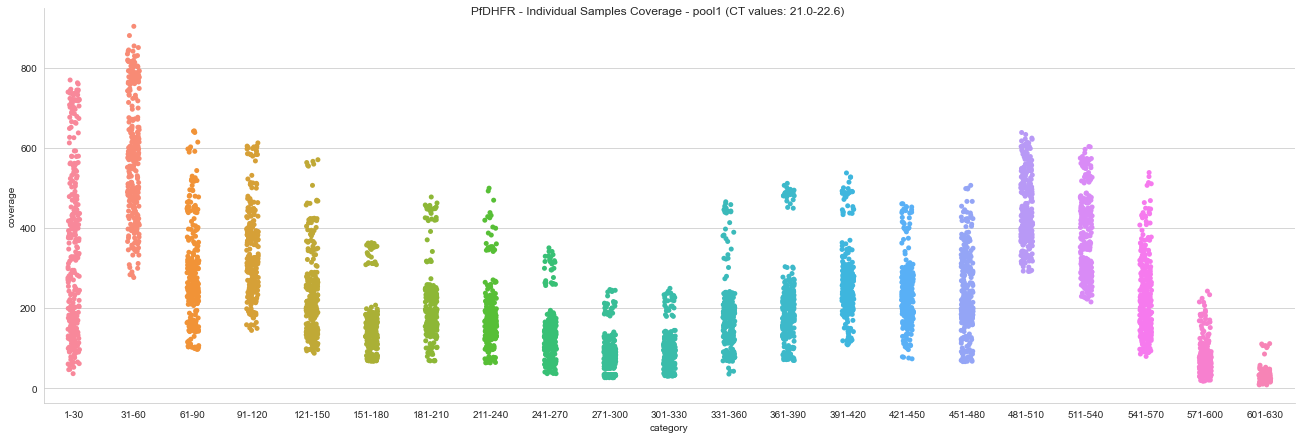

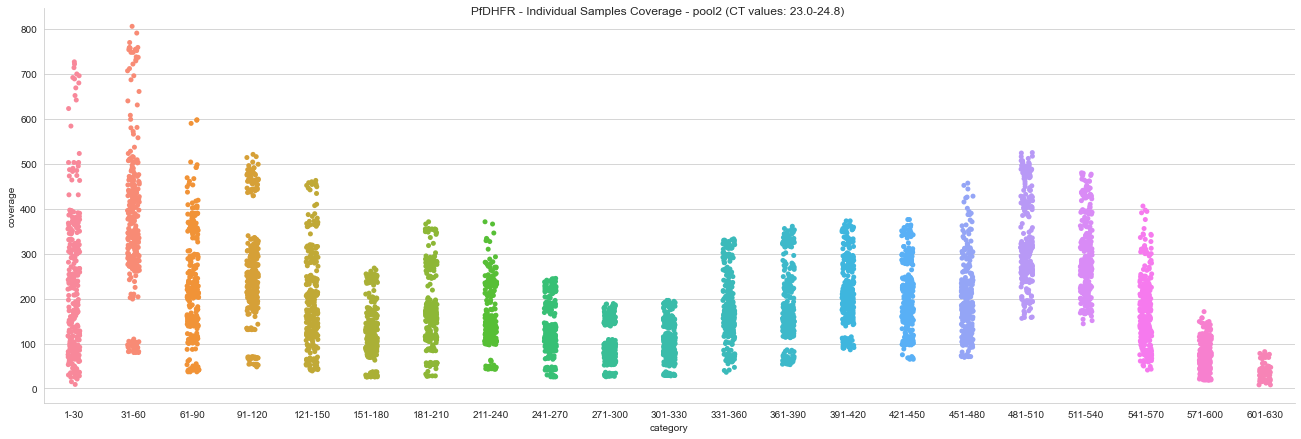

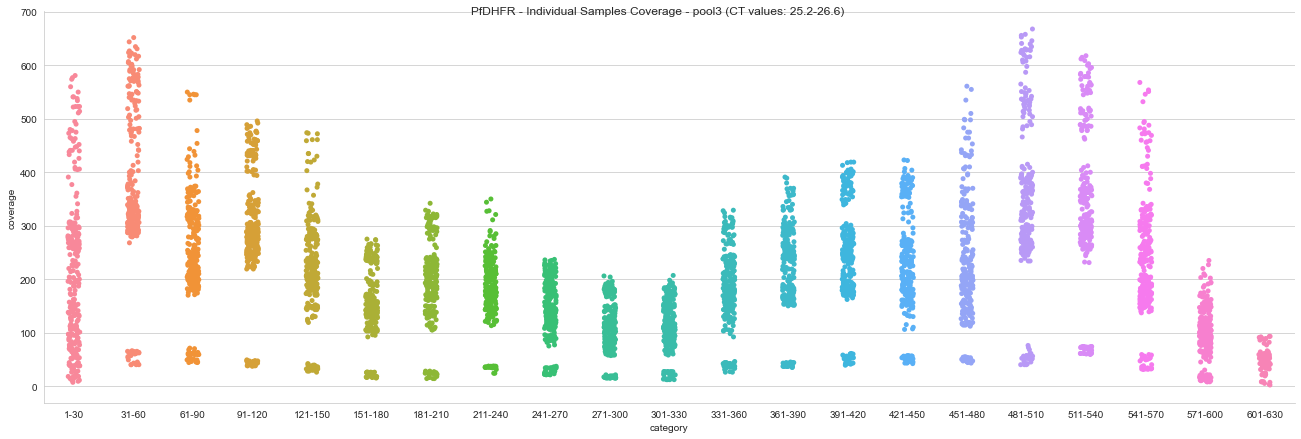

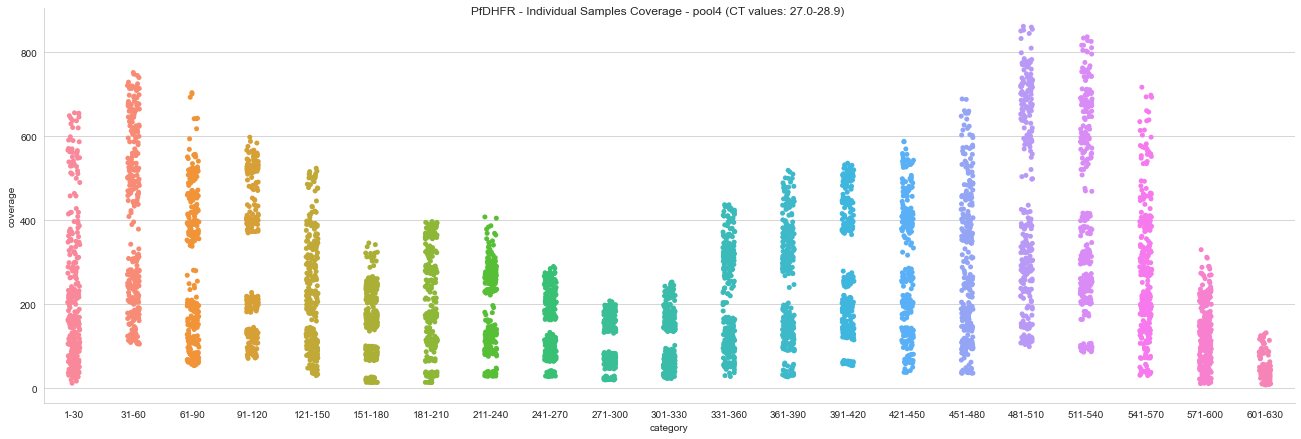

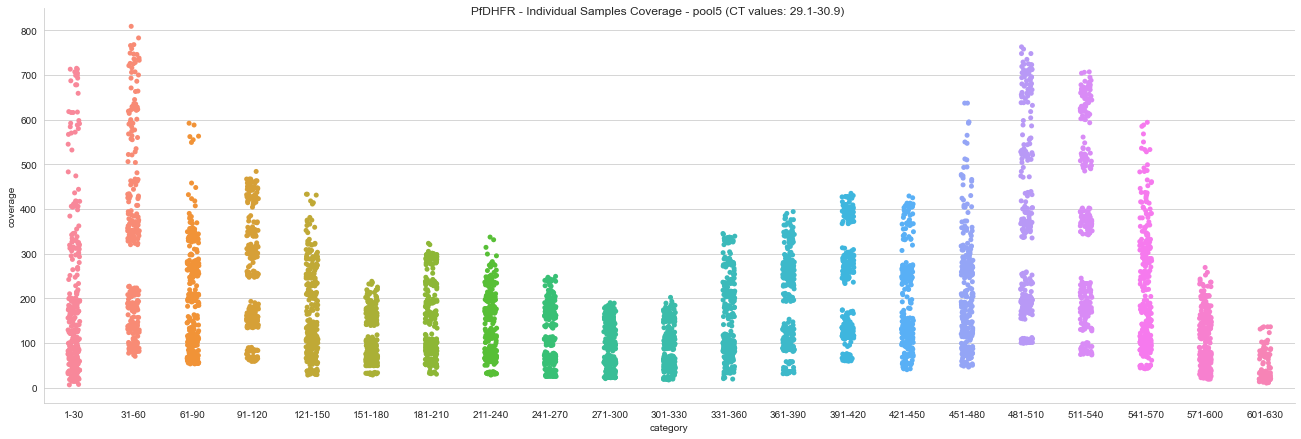

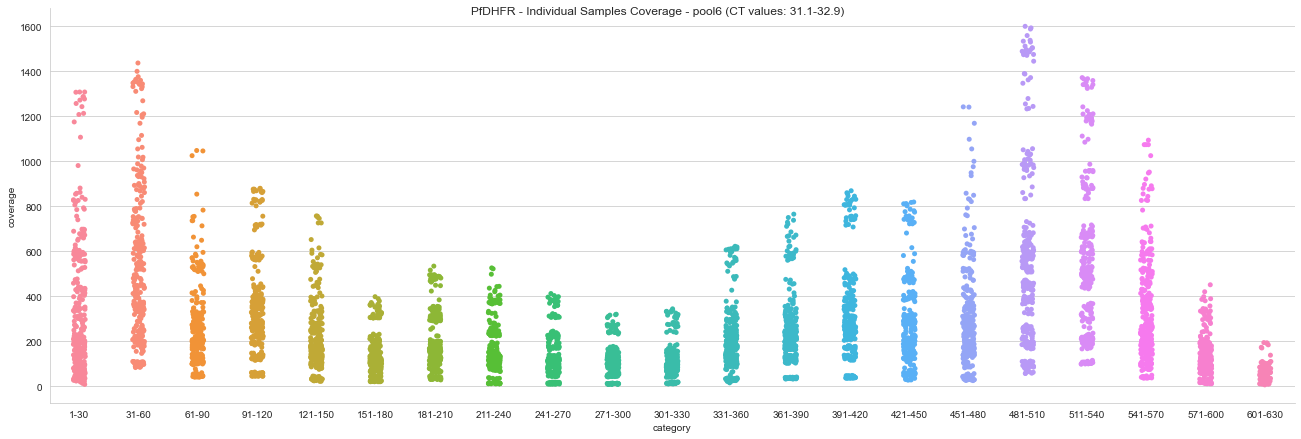

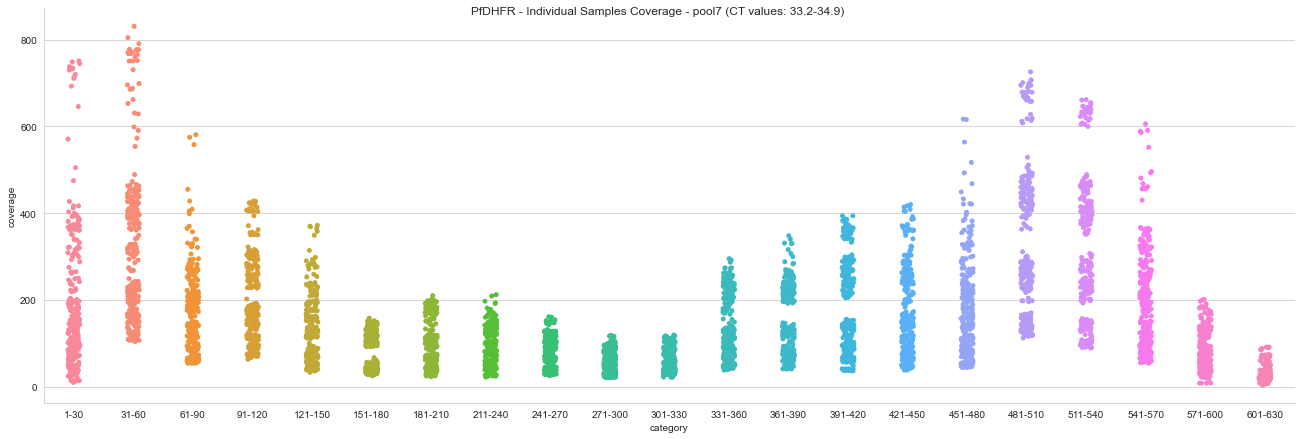

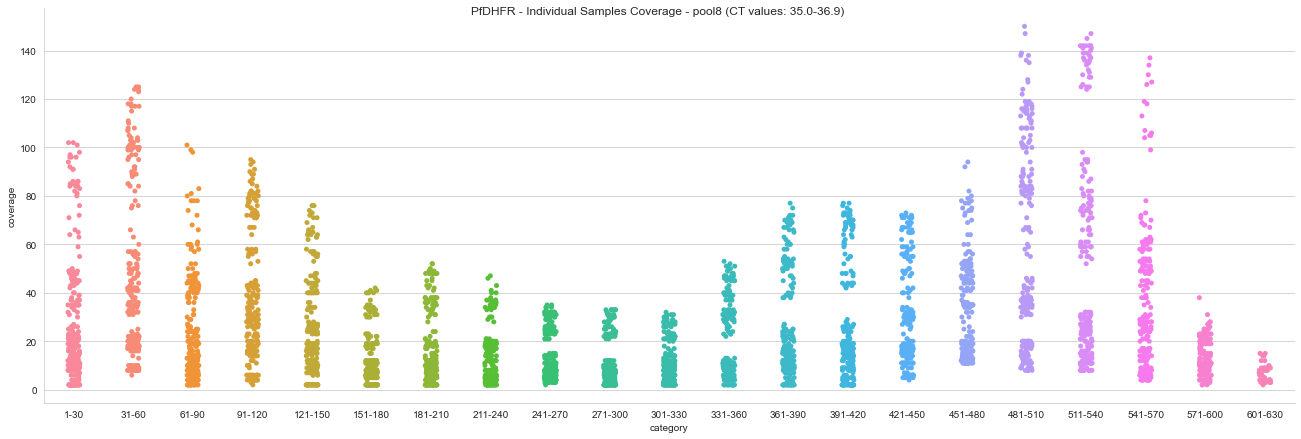

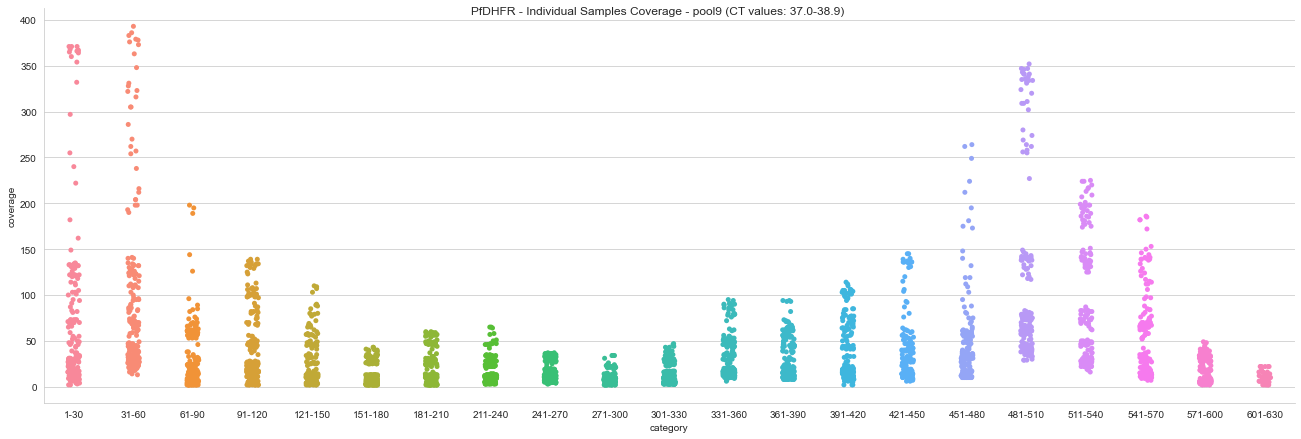

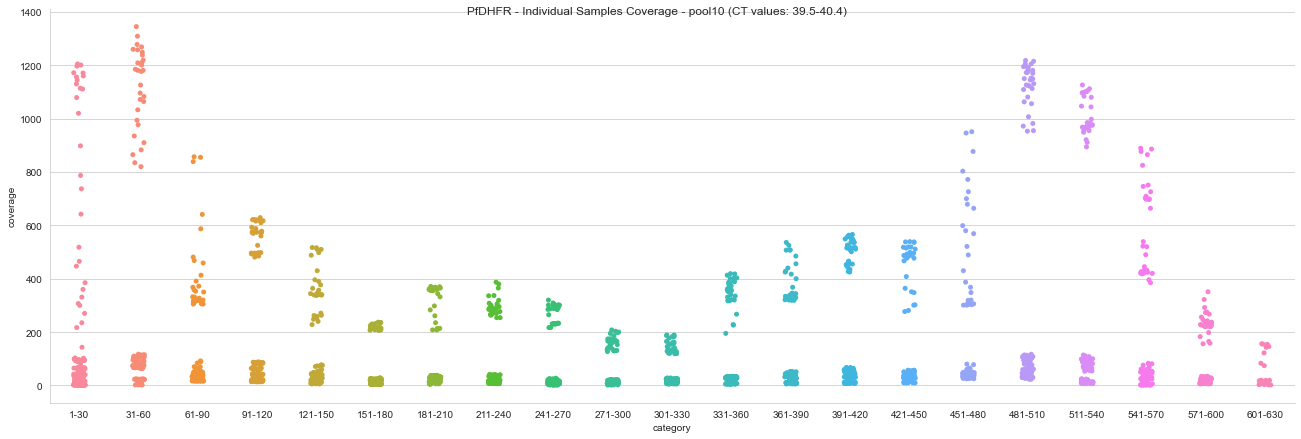

In [44]:
import os
import pandas as pd


for i in range(1, 11):
    pool_id = "pool"+str(i)
    ct_value = ct_list[i-1]
    data = {'position':[], 'coverage':[], 'category':[]} #for new df
    directory = r'/Users/mansi/Desktop/haiti-ind/PfDHFR/Coverage_results/avg_cov/'+pool_id
    for filename in os.listdir(directory):
        if filename != ".DS_Store":
            filepath = os.path.join(directory, filename)
            df1 = pd.read_csv(filepath, sep="\t")
            df1

            ### For position column

            pos = list(df1.Codon_pos)
            for i in range(len(pos)):
                data['position'].append(pos[i])

            ### For coverage column

            cov = list(df1.Codon_coverage)
            for i in range(len(cov)):
                data['coverage'].append(cov[i])


            ### For category column

            start = 1
            end = 30

            for i in range(len(pos)):
                if pos[i] >= start and pos[i] <= end:
                    data['category'].append(str(start)+"-"+str(end))
                if pos[i] == end:
                    start = end+1
                    end = end+30
                    
#             print(len(data['position']))
#             print(len(data['coverage']))
#             print(len(data['category']))



    data_df = pd.DataFrame(data)

    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set_style("whitegrid")

    g= sns.catplot(x="category", y="coverage", data=data_df, height=6, aspect=3)

    title = 'PfDHFR - Individual Samples Coverage - '+pool_id+ " (CT values: "+ct_value+")"
    g.fig.suptitle(title)
#         print(title)
#     plt.show()
    outputfile = '/Users/mansi/Desktop/haiti-ind/PfDHFR/Pool_Images/Catplot/'+"PfDHFR-ind-catplt-"+pool_id+".png"
    plt.savefig(outputfile)
    
#     display(data_df.describe())
